# Reading Data (MileStone - 1)

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("amazonLabelled - amazonLabelled.csv")

In [3]:
df.shape

(999, 3)

In [4]:
df.head()

,S,Feedback,Sentiment
0,1,"Good case, Excellent value.",Positive
1,2,Great for the jawbone.,Positive
2,3,Tied to charger for conversations lasting more...,Negative
3,4,The mic is great.,Positive
4,5,I have to jiggle the plug to get it to line up...,Negative


# Milestone - 2
# Removing Puctuation

In [5]:
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

def remove_puc(text):
    for ele in text:
        if ele in punc:
            text = text.replace(ele, "")
    return text

In [6]:
df["punctuation_removed"] = df["Feedback"].apply(lambda x: remove_puc(x))

In [7]:
df.punctuation_removed[0]

'Good case Excellent value'

In [8]:
df.head()

,S,Feedback,Sentiment,punctuation_removed
0,1,"Good case, Excellent value.",Positive,Good case Excellent value
1,2,Great for the jawbone.,Positive,Great for the jawbone
2,3,Tied to charger for conversations lasting more...,Negative,Tied to charger for conversations lasting more...
3,4,The mic is great.,Positive,The mic is great
4,5,I have to jiggle the plug to get it to line up...,Negative,I have to jiggle the plug to get it to line up...


In [9]:
print(type(df.punctuation_removed))

<class 'pandas.core.series.Series'>


# Tokenization using NLTK


In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [11]:
from nltk.tokenize import sent_tokenize

df["nltk_token"] = df["punctuation_removed"].apply(lambda x: word_tokenize(x))

df.nltk_token[0]

['Good', 'case', 'Excellent', 'value']

In [12]:
df.head()

,S,Feedback,Sentiment,punctuation_removed,nltk_token
0,1,"Good case, Excellent value.",Positive,Good case Excellent value,"[Good, case, Excellent, value]"
1,2,Great for the jawbone.,Positive,Great for the jawbone,"[Great, for, the, jawbone]"
2,3,Tied to charger for conversations lasting more...,Negative,Tied to charger for conversations lasting more...,"[Tied, to, charger, for, conversations, lastin..."
3,4,The mic is great.,Positive,The mic is great,"[The, mic, is, great]"
4,5,I have to jiggle the plug to get it to line up...,Negative,I have to jiggle the plug to get it to line up...,"[I, have, to, jiggle, the, plug, to, get, it, ..."


In [13]:
print(type(df.nltk_token))

<class 'pandas.core.series.Series'>


# Removing Stop_Words

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [15]:
df["StopWords_Removed"] = df['nltk_token'].apply(lambda x: [item for item in x if item not in stopwords.words('english')])

In [16]:
df.head()

,S,Feedback,Sentiment,punctuation_removed,nltk_token,StopWords_Removed
0,1,"Good case, Excellent value.",Positive,Good case Excellent value,"[Good, case, Excellent, value]","[Good, case, Excellent, value]"
1,2,Great for the jawbone.,Positive,Great for the jawbone,"[Great, for, the, jawbone]","[Great, jawbone]"
2,3,Tied to charger for conversations lasting more...,Negative,Tied to charger for conversations lasting more...,"[Tied, to, charger, for, conversations, lastin...","[Tied, charger, conversations, lasting, 45, mi..."
3,4,The mic is great.,Positive,The mic is great,"[The, mic, is, great]","[The, mic, great]"
4,5,I have to jiggle the plug to get it to line up...,Negative,I have to jiggle the plug to get it to line up...,"[I, have, to, jiggle, the, plug, to, get, it, ...","[I, jiggle, plug, get, line, right, get, decen..."


# Vectorization

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection, preprocessing

In [18]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['punctuation_removed'], df['Sentiment'])
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [19]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df['punctuation_removed'])
# transform the training and validation data using count vectorizer object
xtrain_count = count_vect.transform(train_x)
xvalid_count = count_vect.transform(valid_x)

# Tf-idf

In [20]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}',max_features=5000)
tfidf_vect.fit(df['punctuation_removed'])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)

# Plotting graph for sentiment (Internal Insight)

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [22]:
def find(x):
    ans=0
    for sen in x:
        if (sen=='Positive'):
            ans=ans+1
    return ans 

In [23]:
Positive = find(df["Sentiment"])
print(Positive)

500


In [24]:
Negative = len(df.Sentiment)-Positive
print(Negative)

499


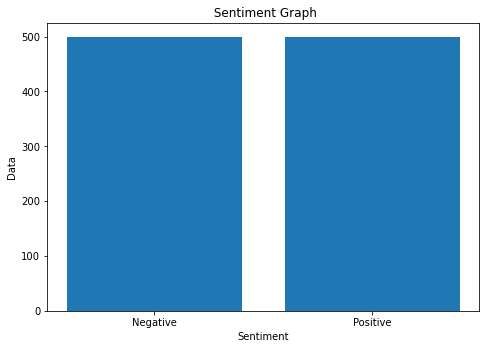

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Sentiment = ['Negative', 'Positive']
data = [Negative, Positive]
ax.bar(Sentiment, data)
plt.xlabel('Sentiment')
plt.ylabel('Data')
plt.title(" Sentiment Graph")
plt.show()